In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
from utils import angular_freq, sample_space, sample_rate

## Altering the Sounds

Now that we know how to create sounds, lets look at the ways we can alter or modify these sounds

#### Modulators
Modulation means altering certain characteristics of a sound wave, typically the amplitude, frequency, or phase of an audio signal, using a modulating source. This modulating source, often referred to as a modulator, affects the parameters of a carrier waveform (usually another audio signal) to create more complex and rich sound textures. We also have a modulation index which is a measure of extent of modulation done on a carrier signal

#### FM
In frequency modulation, the frequency of a signal is changed to encode information. The receiver decodes this information. We widely use this in FM radio broadcasting.

let's say you and I have a string where each of us holds one end. If I pull on it in a constant pattern, say one tug per second, that would be our frequency. Now in order to send information we agree of a certain code (i.e A is two tugs in a second, B is three, C is four, etc.) Now to send you a message via string, I tug the appropriate number of times per second, varying the frequency of my tugs to match our code. This is frequency modulation in simple terms.

We can do the same thing with Amplitude, its called AM or amplitude modulation but it does not work as well as FM (This is meant to be an explicit Arctic Monkeys Reference)


In [2]:
# Carrier signal
carrier_freq = 50  # Hz
carrier_omega = angular_freq(carrier_freq)
carrier_signal = np.sin(carrier_omega)

# Modulating signal
modulating_freq = 5  # Hz
modulating_omega = angular_freq(modulating_freq)
modulating_signal = np.sin(modulating_omega)

# Generate FM signal: sin(ω_c * t + β * sin(ω_m * t))
modulation_index = 10  # Modulation depth/sensitivity
fm_signal = np.sin(carrier_omega + modulation_index * modulating_signal)

In [3]:
ipd.Audio(fm_signal, rate=sample_rate)

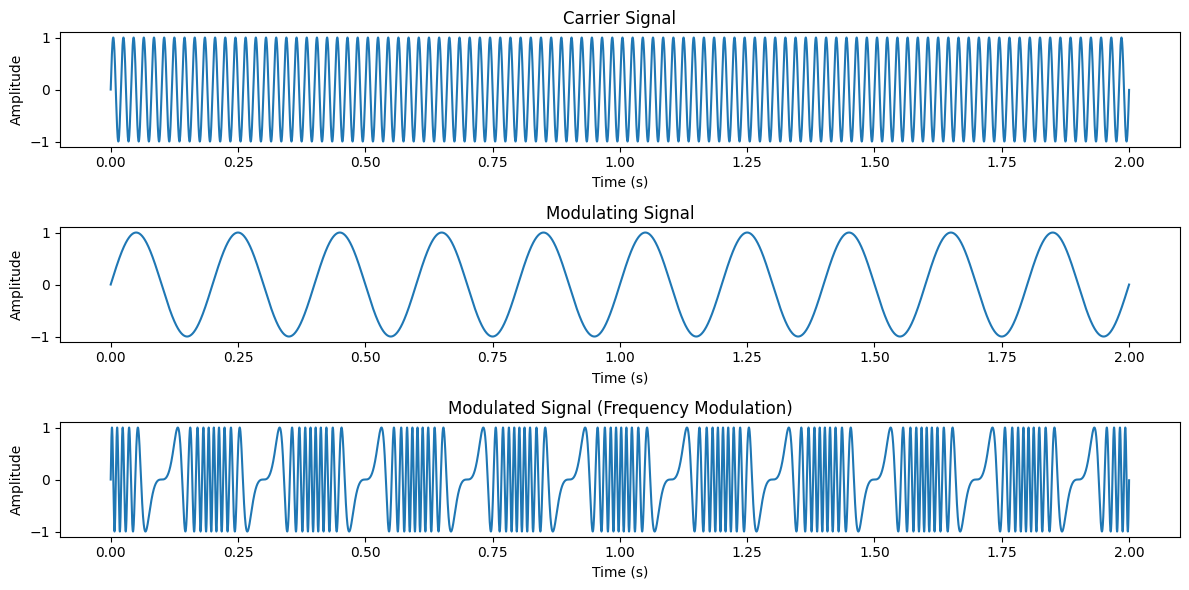

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(sample_space, carrier_signal)
plt.title('Carrier Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(sample_space, modulating_signal)
plt.title('Modulating Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(sample_space, fm_signal)
plt.title('Modulated Signal (Frequency Modulation)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### [E] AM
In amplitude modulation, the amplitude of a carrier waveform is modulated by a separate modulating waveform. The modulating waveform affects the volume or amplitude of the carrier waveform, creating harmonic sidebands around the carrier frequency. When applied in a synthesizer, AM can produce metallic or bell-like sounds, and it's useful for creating a variety of tonal textures.



In [5]:
# Carrier signal parameters
carrier_freq = 200  # Hz
carrier_amplitude = 1.0
carrier_omega = angular_freq(carrier_freq)

# Modulating signal parameters
modulating_freq = 5  # Hz
modulating_amplitude = 0.8  # depth of modulation (0-1 range for standard AM)
modulating_omega = angular_freq(modulating_freq)

# Generate signals
modulating_signal = modulating_amplitude * np.sin(modulating_omega)
carrier_signal = carrier_amplitude * np.sin(carrier_omega )

# Generate AM signal: A_c * (1 + μ * sin(ω_m * t)) * sin(ω_c * t)
# where μ is the modulation depth (0-1)
am_signal = carrier_amplitude * (1 + modulating_signal) * np.sin(carrier_omega)

In [6]:
ipd.Audio(am_signal, rate=sample_rate)

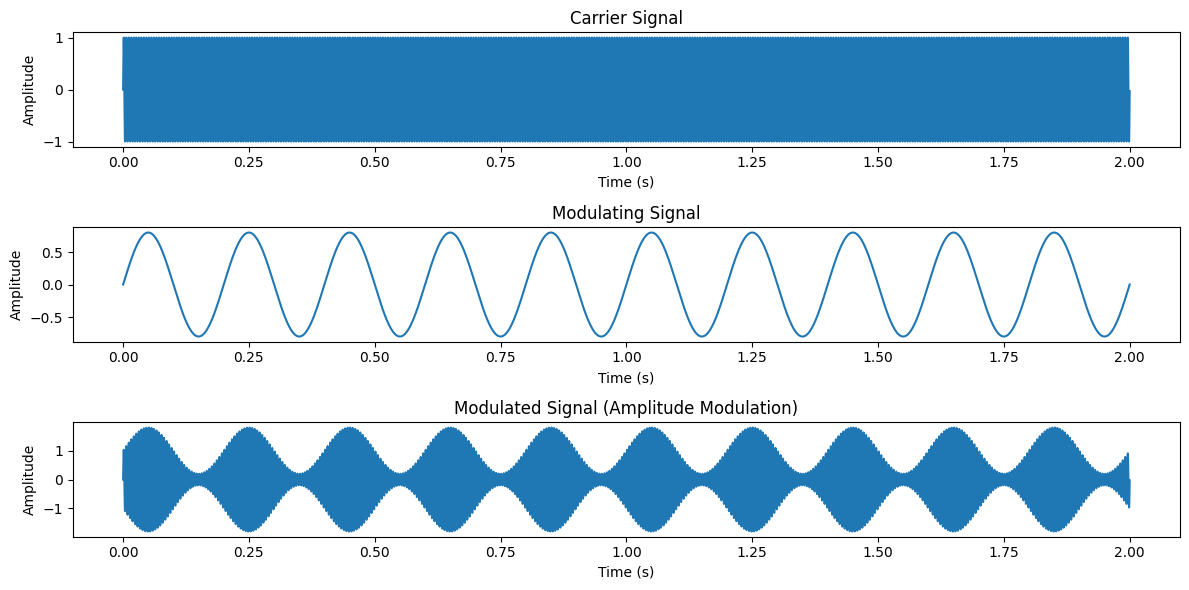

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(sample_space, carrier_signal)
plt.title('Carrier Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(sample_space, modulating_signal)
plt.title('Modulating Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(sample_space, am_signal)
plt.title('Modulated Signal (Amplitude Modulation)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Music and Modulation
Modulation can be used to create very unique sounds and can allow changing of timbre and these harmonics would change depending on the kind of modulation and the signal used, In the end we can produce create more intricate and diverse sounds

#### FM

FM can be used with non-harmonic ratios between carrier and modulator frequencies to create characteristic bell-like sounds. Higher modulation indices produce more inharmonic overtones

In [8]:
def create_fm_tone(carrier_freq, mod_freq, mod_index, amplitude=0.5, t=sample_space):
    carrier_omega = angular_freq(carrier_freq)
    mod_omega = angular_freq(mod_freq)
    
    # Pure FM synthesis: carrier + modulator
    modulator = np.sin(mod_omega)
    fm_signal = amplitude * np.sin(carrier_omega * t + mod_index * modulator)
    
    # Normalize
    fm_signal = fm_signal / np.max(np.abs(fm_signal))
    return fm_signal

In [9]:
# Bell-like sound (C:M ratio near 1:1.4)
bell_tone = create_fm_tone(
    carrier_freq=200,
    mod_freq=280,
    mod_index=5.0
)
ipd.Audio(bell_tone, rate=sample_rate)

In [10]:
# Gong-like sound (C:M ratio 1:1.78)
gong_tone = create_fm_tone(
    carrier_freq=150,
    mod_freq=267,  # C:M ratio of 1:1.78
    mod_index=8.0
)
ipd.Audio(gong_tone, rate=sample_rate)

In [11]:
# Metallic Chime (non-integer C:M ratio around 1:3.5)
metal_hit = create_fm_tone(
    carrier_freq=350,
    mod_freq=1470,
    mod_index=10.0
)
ipd.Audio(metal_hit, rate=sample_rate)

### Tremolo Effect

This is the most basic AM effect, where amplitude varies periodically, creating a pulsating sound. It is made by variation in amplitude of sound and is also called underwater effect. Tremolo uses the AM equation: `output = carrier * (1 + modulator)` where the modulator is a low-frequency oscillator (LFO) typically between 1-20 Hz.

Tremolo is one of the oldest electronic effects in music, used extensively in guitar amplifiers, organs, and synthesizers. Tremolo maintains the original pitch and simply varies the amplitude, creating a characteristically pulsating, rhythmic quality to sustained notes.


In [12]:
def create_tremolo(carrier_signal, tremolo_rate, tremolo_depth):
    # Create modulator signal (LFO)
    modulator = tremolo_depth * np.sin(angular_freq(tremolo_rate))
    
    # Apply AM modulation: carrier * (1 + modulator)
    # We normalize the modulator to ensure it stays in the range [-depth, depth]
    tremolo_signal = carrier_signal * (1 + modulator)
    
    # Normalize output
    tremolo_signal = tremolo_signal / np.max(np.abs(tremolo_signal))
    
    return tremolo_signal

In [13]:
carrier_freq = 440  # A4 note
carrier_amplitude = 0.8
carrier_signal = carrier_amplitude * np.sin(angular_freq(carrier_freq))

tremolo_rate = 6.5  # 4, 6.5, 16 (different rates)
tremolo_depth = 0.5  # 0.8, 0.5, 0.9 (0.5 ~ 50% depth)
tremolo = create_tremolo(carrier_signal, tremolo_rate, tremolo_depth)
ipd.Audio(tremolo, rate=sample_rate)

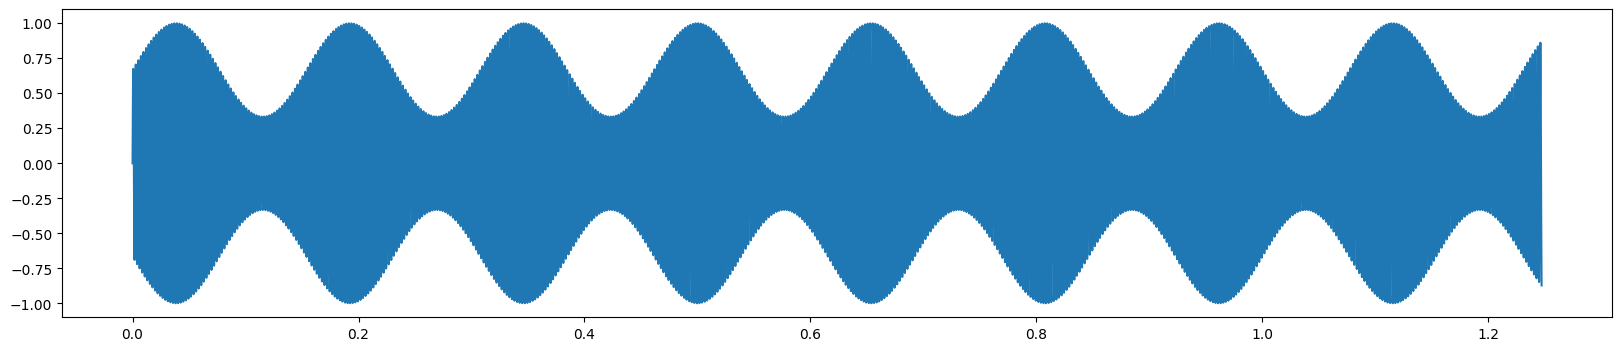

In [14]:
plt.figure(figsize=(20, 4))
plt.plot(sample_space[:55000], tremolo[:55000])